In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
mnist_df = pd.read_csv('utech-summer-school-99-Machine-Learning\Datasets\MNIST\mnist_train.csv')

In [3]:
result = mnist_df['label'] 
predictors = mnist_df.drop(['label'], axis = 1)

X = predictors.to_numpy()
Y = result.to_numpy()

X_std = X/255

[[ 0.48605565 -1.22605225]
 [ 3.96752051 -1.15630085]
 [-0.20329509  1.53798947]
 ...
 [-0.69822373  0.62781734]
 [ 0.51219641 -0.02190489]
 [-0.68012824 -0.09694476]]


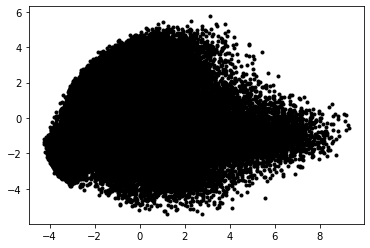

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_std)

print(X_2d)
plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.')

# DBScan

In [5]:
from sklearn.cluster import DBSCAN

number of clusters=  11
number of noise=  414
*****************************
Xs whith label= -1 are:
[[-5.02218808e-16  1.28679404e-18  1.34538423e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.78616560e-16  4.36175734e-18  2.15378479e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.78234461e-16 -7.69624085e-19  7.02784977e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.05916598e-16 -5.84610989e-19  7.80218184e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.79134888e-16 -4.79024114e-18 -1.38584822e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.33291364e-16  1.38608855e-18  1.42918903e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Xs whith label= 0 are:
[[-2.13873885e-16  1.26641397e-18  5.93572750e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.77612748e-16 -1.74255123e-19  4.57731353e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.71079067e-16 -1.74713349e-

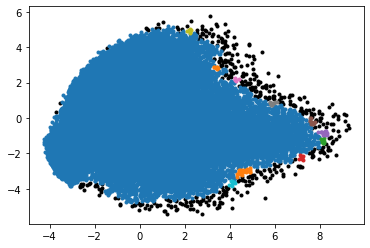

In [6]:
clu = DBSCAN(eps=0.18, min_samples=8, n_jobs=-1)
labels = clu.fit_predict(X_2d)
y = clu.labels_

print('number of clusters= ', y.max())

plt.plot(X_2d[y == -1, 0], X_2d[y == -1, 1], 'k.')
for k in range(0,y.max()+1):
    plt.plot(X_2d[y == k, 0], X_2d[y == k, 1], '.')
    
n_noise_ = list(labels).count(-1)
print('number of noise= ', n_noise_)

print('*****************************')

for i in range(-1, y.max()+1):
    X_recos = pca.inverse_transform(X_2d[y==i])
    print('Xs whith label=', i, 'are:')
    print(X_recos)

# KMeans

In [7]:
from sklearn.cluster import KMeans

C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


5901.933861232199


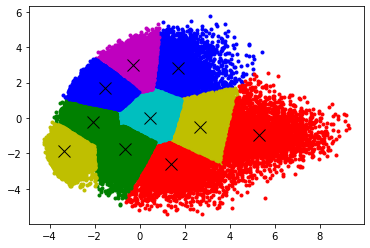

In [8]:
clu = KMeans(n_clusters=10, n_jobs=-1)
clu.fit_predict(X_2d)

centers = clu.cluster_centers_

y = clu.labels_

print(clu.inertia_/clu.n_clusters)

colors = 'rgbycmrgby'

for k in range(clu.n_clusters):
    plt.plot(X_2d[y == k, 0], X_2d[y == k, 1], colors[k]+'.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'kx', markersize=12)

Text(0, 0.5, 'inertia')

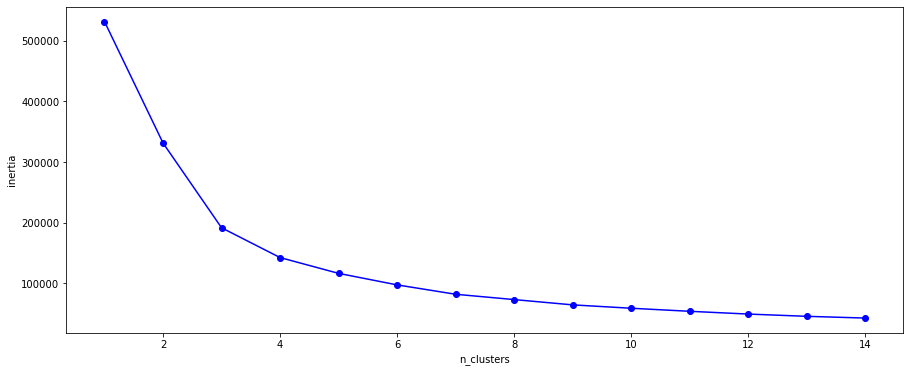

In [9]:
inertias = []

for k in range(1,15):
    clu = KMeans(n_clusters=k)
    clu.fit_predict(X_2d)
    inertias.append(clu.inertia_)

plt.figure(figsize=(15, 6))    
plt.plot(range(1,15), inertias, 'bo-')
plt.xlabel('n_clusters')
plt.ylabel('inertia')

In [11]:
totalAccuracy = 0
n_clusters=10
for k in range(1, n_clusters+1):
    clusterAccuracy = max(y==k) / sum(y==k) * 100.0
    totalAccuracy += clusterAccuracy
print("KMeans clustering Accuracy " + str(totalAccuracy / 10))

KMeans clustering Accuracy nan


<ipython-input-11-7b0c3fd7fcac>:4: RuntimeWarning: invalid value encountered in true_divide
  clusterAccuracy = max(y==k) / sum(y==k) * 100.0
